In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
sns.set(font_scale=1.1)

In [45]:
df_sales = pd.read_csv('../data/sales_clean.csv')
df_items = pd.read_csv('../data/items.csv')

In [46]:
#convertimos la columna fecgha a formato datetime
df_sales['date'] = pd.to_datetime(df_sales['date'], format='%d.%m.%Y')

In [ ]:
#Creamos una nueva columna con año y mes combinados
df_sales['month_year'] = df_sales['date'].dt.to_period('M')

In [ ]:
#Agrupamos ventas por mes
monthly_sales = df_sales.groupby('month_year')['item_cnt_day'].sum()

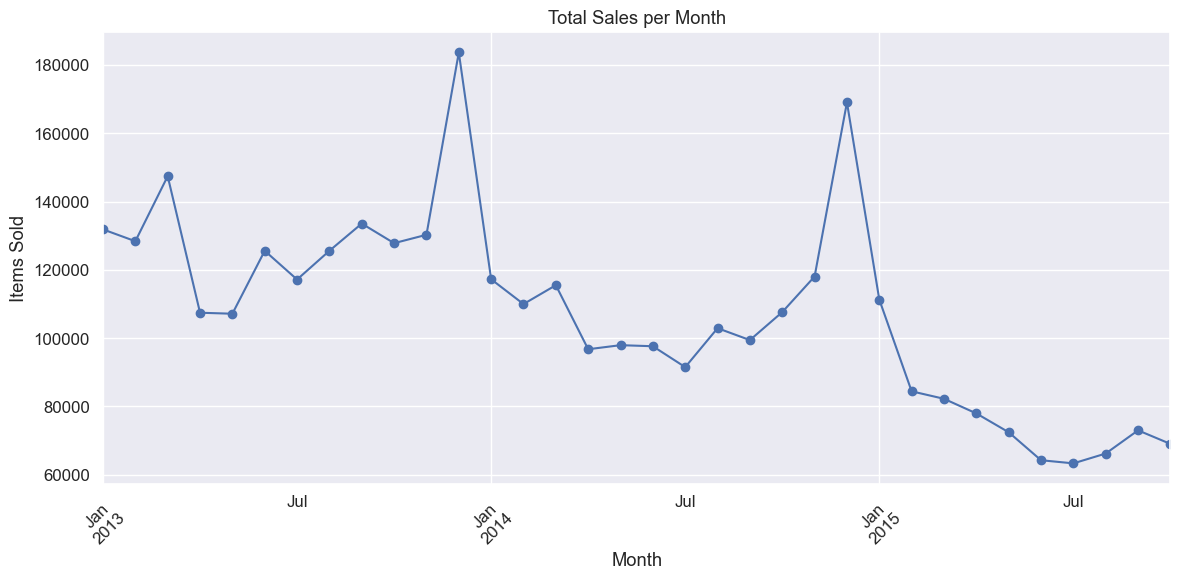

In [ ]:
#Ventas totales por mes
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Items Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

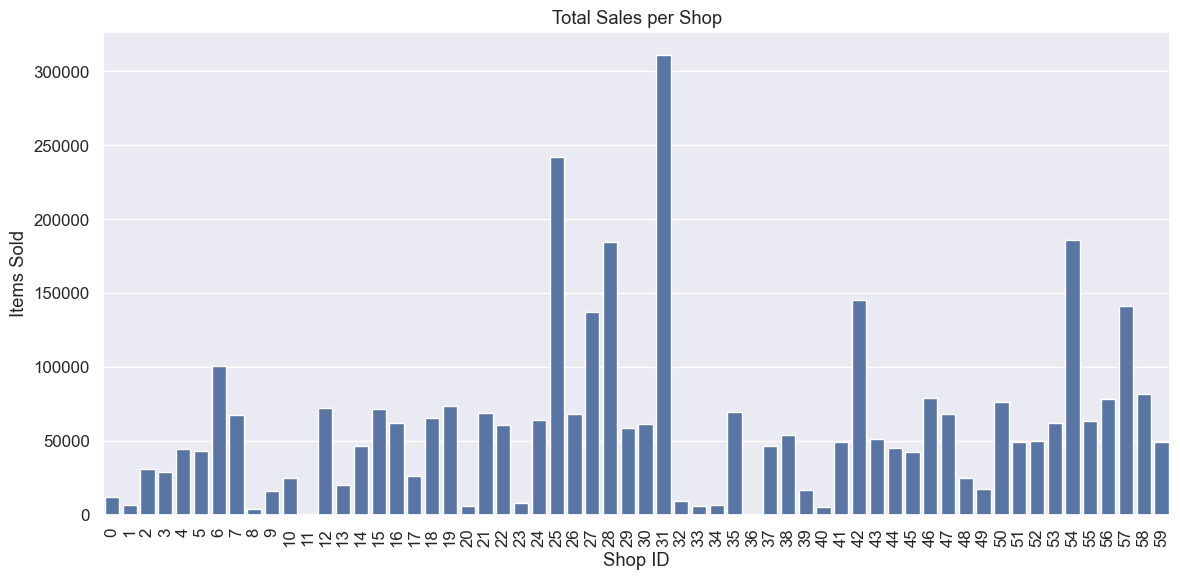

In [ ]:
#Ventas por tienda
sales_by_shop = df_sales.groupby('shop_id')['item_cnt_day'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_shop.index, y=sales_by_shop.values)
plt.title('Total Sales per Shop')
plt.xlabel('Shop ID')
plt.ylabel('Items Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

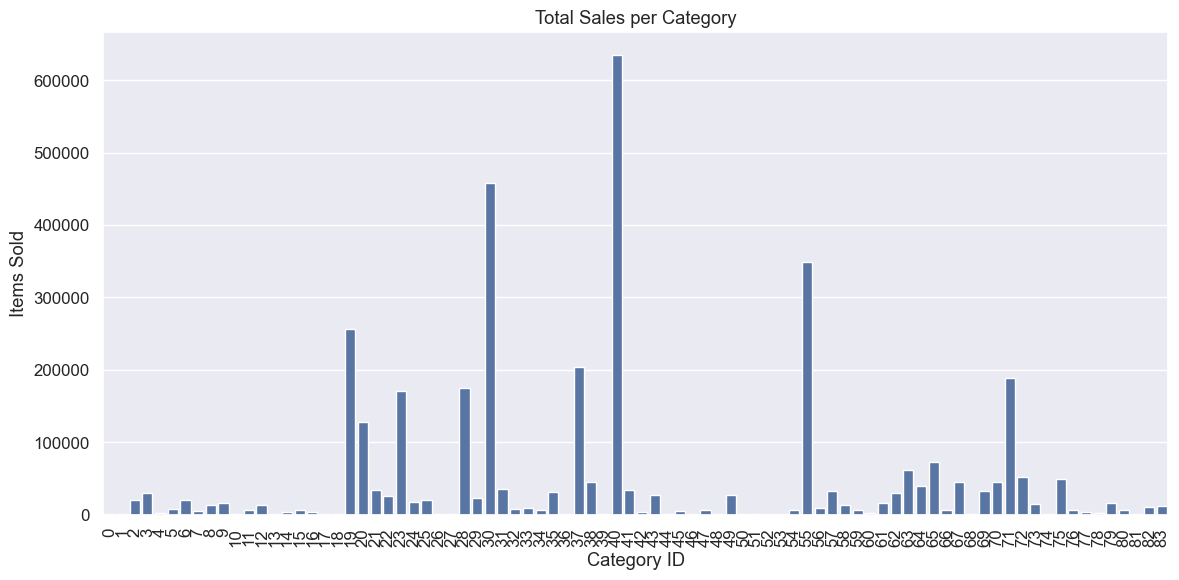

In [54]:
#Sumar ventas por producto (solo columna item_cnt_day)
sales_by_item = df_sales.groupby('item_id')['item_cnt_day'].sum().reset_index()

#Unir con items para obtener la categoría de cada producto
sales_by_item = sales_by_item.merge(df_items[['item_id', 'item_category_id']], on='item_id')

#Agrupar por categoría
sales_by_cat = sales_by_item.groupby('item_category_id')['item_cnt_day'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_cat.index, y=sales_by_cat.values)
plt.title('Total Sales per Category')
plt.xlabel('Category ID')
plt.ylabel('Items Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

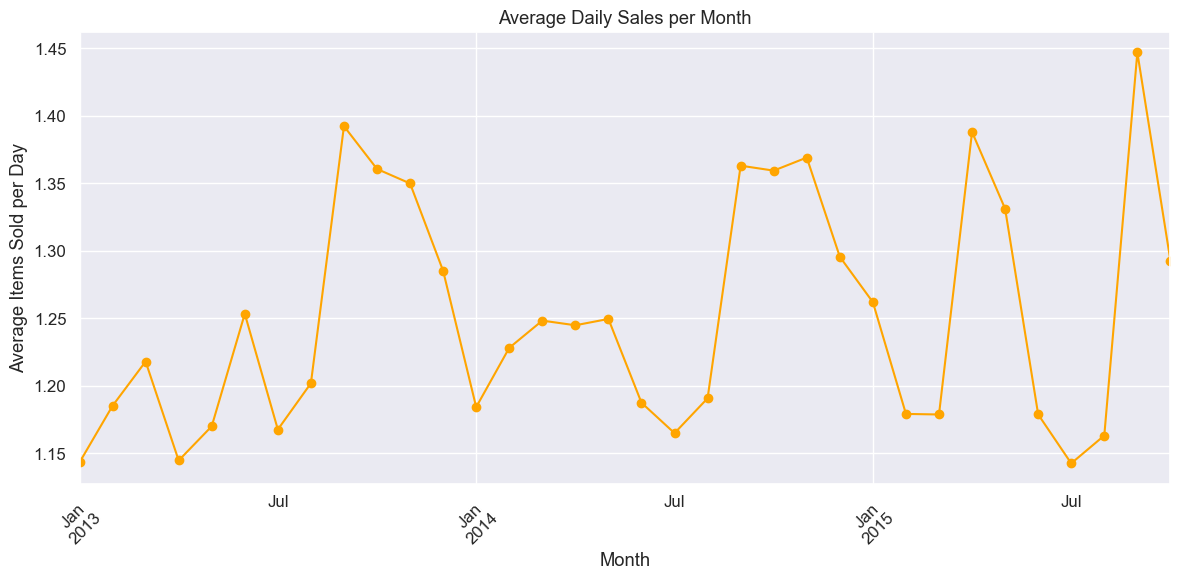

In [ ]:
#Ventas promedio por mes
monthly_avg = df_sales.groupby(df_sales['date'].dt.to_period('M'))['item_cnt_day'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(marker='o', color='orange')
plt.title('Average Daily Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Items Sold per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

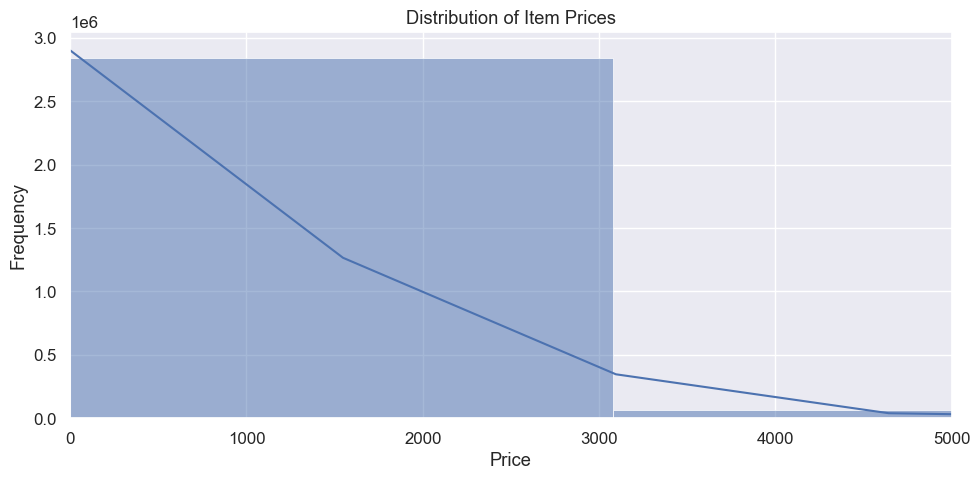

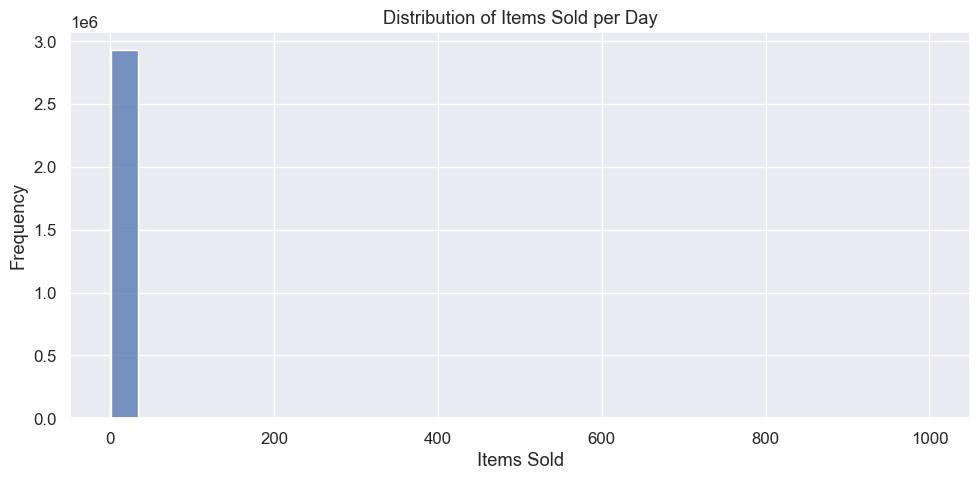

In [55]:
# Histog precios
plt.figure(figsize=(10, 5))
sns.histplot(df_sales['item_price'], bins=100, kde=True)
plt.xlim(0, 5000)  # Limitar para ver mejor (sin outliers)
plt.title('Distribution of Item Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histog cantidades
plt.figure(figsize=(10, 5))
sns.histplot(df_sales['item_cnt_day'], bins=30, kde=False)
plt.title('Distribution of Items Sold per Day')
plt.xlabel('Items Sold')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()